## Logistic Regression Model Comparisons - Lab

## Introduction

In this lab, you'll further investigate how to tune your personal logistic regression implementation, as well as that of sci-kit learn in order to produce better models.

## Objectives

* Understand and implement logistic regression
* Compare logistic model outputs

In the previous lab, you were able to verify your manual logistic regression model output using sci-kit learn. However, that model did not include an intercept or any regularization. In this investigative lab, you will analyze the impact these two tuning parameters.

## Importing the Data

As with the previous lab, import the dataset stored in **heart.csv**

In [44]:
#Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context('talk')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Problem Formulation

Define X and y as with the previous lab. This time, follow best practices and also implement a standard train-test split.  
**For consistency of results, use random_state=17.**

In [3]:
#Your code here
X = df[df.columns.difference(['target'])]
y = df.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Initial Model - Personal Implementation

Use your code from the previous lab to once again train a logistic regression algorithm on the training set.

In [99]:
# Your code here
logreg = LogisticRegression(fit_intercept=False, C=1e12)
logreg.fit(X_train, y_train)

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

## Now use your algorithm to make [probability] predictions on the test set

In [16]:
#Your code here
y_test_pred = logreg.predict(X_test)

## Create an ROC curve for your predictions

Test AUC: {} 0.9032258064516129
AUC: 0.9032258064516129


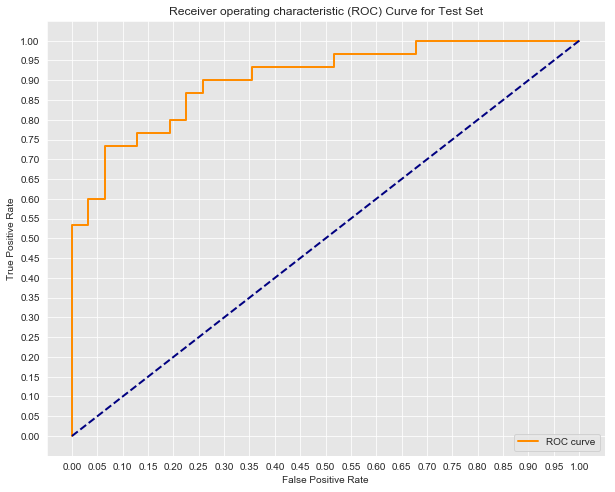

In [23]:
#Your code here
y_score = logreg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc_test = auc(fpr,tpr)
print("Test AUC: {}",auc_test)

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

## Update your ROC curve to not only include a graph of the test set, but one of the train set

Test AUC: {} 0.9032258064516129
Train AUC: {} 0.9280719972308757


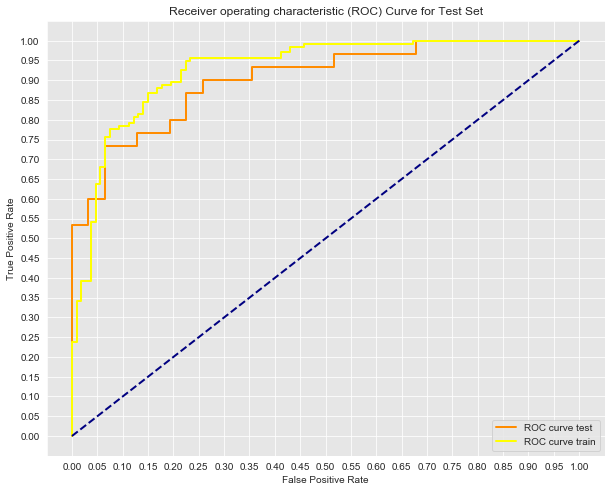

In [28]:
# Your code here
#TEST
y_score = logreg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc_test = auc(fpr,tpr)
print("Test AUC: {}",auc_test)

#TRAIN
y_train_score = logreg.decision_function(X_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)
auc_train = auc(train_fpr,train_tpr)
print("Train AUC: {}",auc_train)

#PLOT
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve test')
plt.plot(train_fpr, train_tpr, color='yellow',
         lw=lw, label='ROC curve train')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
plt.show()

## Create a confusion matrix for your predictions

Use a standard decision boundary of .5 to convert your probabilities output by logistic regression into binary classifications. (Again this should be for the test set.) Afterwards, feel free to use the built in sci-kit learn methods to compute the confusion matrix as we discussed in previous sections.

In [81]:
y_pred_proba = logreg.predict_proba(X_test)

In [92]:
thresh = 0.5
y_pred = 1*(y_pred_proba[:,1]>=thresh)

In [97]:
np.sum((y_pred==1) & (y_test==0))

10

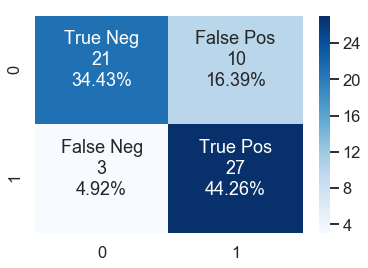

In [73]:
# Your code here
cf_test = confusion_matrix(y_test, y_test_pred)
group_labels = ['True Neg','False Pos','False Neg','True Pos']
make_cool_heatmap(cf_test,group_names=group_labels, count=True,percent=True,cbar=True)

## Initial Model - sci-kit learn

Do the same using the built in method from sci-kit learn. To start, create an identical model as you did in the last section; turn off the intercept and set the regularization parameter, C, to a ridiculously large number such as 1e16. 

In [10]:
# Your code here

## Create an ROC Curve for the sci-kit learn model

In [11]:
#Your code here

## As before add an ROC curve to the graph for the train set as well

In [12]:
#Your code here

## Adding an Intercept

Now add an intercept to the sci-kit learn model. Keep the regularization parameter C set to a very large number such as 1e16. Plot all three models ROC curves on the same graph.

In [100]:
# Your code here
logreg2 = LogisticRegression(fit_intercept=True, C=1e16)
logreg2.fit(X_train, y_train)

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1e+16, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Test AUC: {} 0.9032258064516129
Test AUC: {} 0.886021505376344


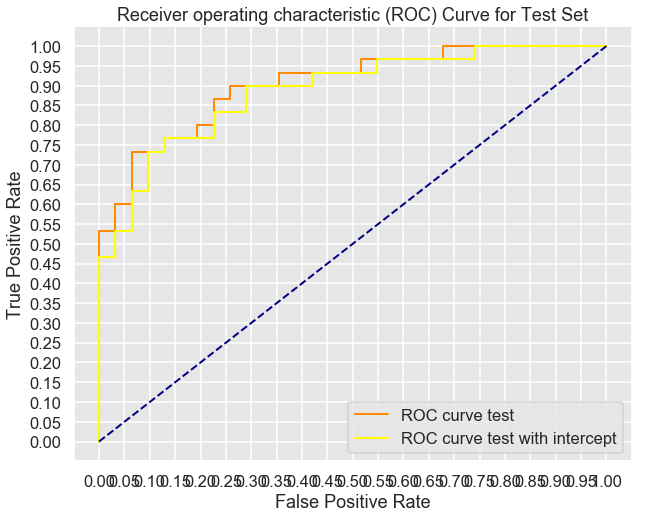

In [104]:
# Your code here
#TEST
y_score = logreg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc_test = auc(fpr,tpr)
print("Test AUC: {}",auc_test)

#TEST LOGREG2
y_score2 = logreg2.decision_function(X_test)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_score2)
auc_test2 = auc(fpr2,tpr2)
print("Test AUC: {}",auc_test2)

#PLOT
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve test')
plt.plot(fpr2, tpr2, color='yellow',
         lw=lw, label='ROC curve test with intercept')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
plt.show()

## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At minimum, create 5 different subplots with varying regularization (C) parameters. For each, plot the ROC curve of the train and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and train auc as you go along.

Test AUC with C=1.0: 0.9150537634408603
Train AUC with C=1.0: 0.9231568016614746


/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


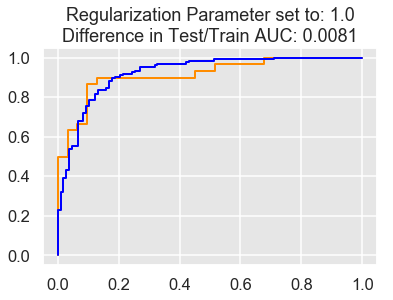

Test AUC with C=5.75: 0.9010752688172042
Train AUC with C=5.75: 0.9311872620283835


/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


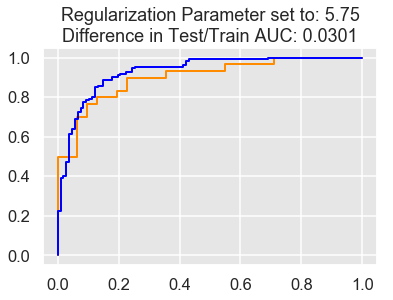

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test AUC with C=10.5: 0.8946236559139785
Train AUC with C=10.5: 0.9322256836275528


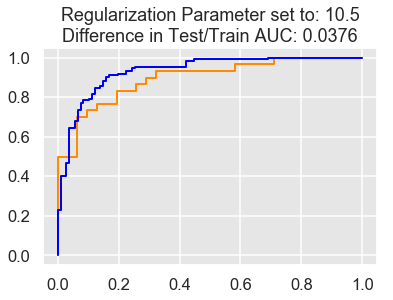

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test AUC with C=15.25: 0.8956989247311828
Train AUC with C=15.25: 0.9327102803738317


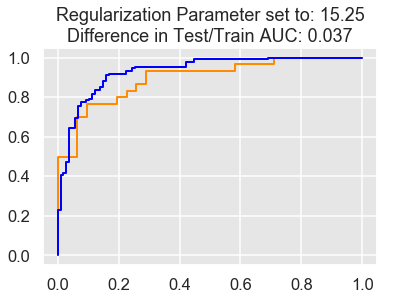

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test AUC with C=20.0: 0.8956989247311828
Train AUC with C=20.0: 0.9329179646936656


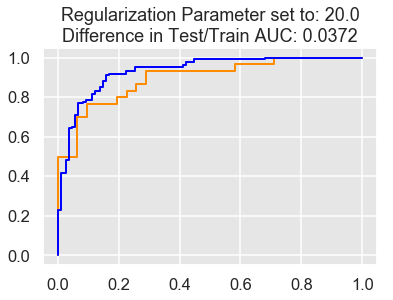

In [105]:
# Your code here
c_params = np.linspace(1,20,5)
fpr = []
tpr = []

for c_param in c_params:
    #fit a model
    logreg = LogisticRegression(fit_intercept=True, C=c_param)
    logreg.fit(X_train, y_train)
    
    #Print Stats
    y_test_score = logreg.decision_function(X_test)
    y_train_score = logreg.decision_function(X_train)

    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    
    test_auc = auc(test_fpr, test_tpr)
    train_auc = auc(train_fpr, train_tpr)
    auc_diff = round(train_auc - test_auc, 4)
    

    print('Test AUC with C={}: {}'.format(c_param, auc(test_fpr, test_tpr)))
    print('Train AUC with C={}: {}'.format(c_param, auc(train_fpr, train_tpr)))
    
    # Add the plot
    plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')
    plt.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='train ROC curve')
    plt.title('Regularization Parameter set to: {}\nDifference in Test/Train AUC: {}'.format(c_param, auc_diff))
    plt.show()

## Comment on how the Regularization Parameter Impacts the ROC curves plotted above

#Your response here

## Summary

In this lab, you reviewed many of the accuracy measures for classification algorithms and observed the impact of additional tuning models using intercepts and regularization.

In [33]:
def make_cool_heatmap(cf,group_names=None,count=True,percent=True,cbar=True):
    blanks = ['' for i in range(cf.size)]
    if group_names and len(group_names)==cf.size:
        group_labels = group_names
    else:
        group_labels = blanks
        
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks
        
    if percent:
        group_percentages = ["{0:.2%}\n".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    labels = [f"{v1}\n{v2}{v3}" for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(cf.shape[0],cf.shape[1])
    sns.heatmap(cf,annot=labels,fmt="",cmap='Blues',cbar=cbar)